# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

%matplotlib inline

# Carregando dataset

In [2]:
# dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [3]:
qtd, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
print(X.shape)

(1140, 2914)


In [4]:
tam_por_pessoa = 10
num_pessoas = 5
pessoas = []
for i in range(0, num_pessoas):
    pessoa = np.where(y==i)[0][:tam_por_pessoa]
    pessoas.append(pessoa)
indexes = np.hstack(pessoas)

# labels
for i, name in enumerate(target_names):
    print(i, ": ", name)

0 :  Colin Powell
1 :  Donald Rumsfeld
2 :  George W Bush
3 :  Gerhard Schroeder
4 :  Tony Blair


## Criando um subset do dataset, com 10 fotos por pessoa (5 pessoas)

In [5]:
# subset
subset = X[indexes]
y_subset = y[indexes]
print(subset)

[[135.33333  140.       145.66667  ...  90.666664  31.333334  22.333334]
 [ 79.        84.666664  80.333336 ... 249.66667  249.66667  225.      ]
 [ 54.333332  56.        57.       ... 126.333336  94.        37.      ]
 ...
 [ 91.666664  97.666664 108.333336 ...  38.        35.333332  31.666666]
 [ 52.333332  61.        54.666668 ... 228.33333  230.33333  234.      ]
 [ 54.        51.        63.333332 ... 231.33333  227.       180.      ]]


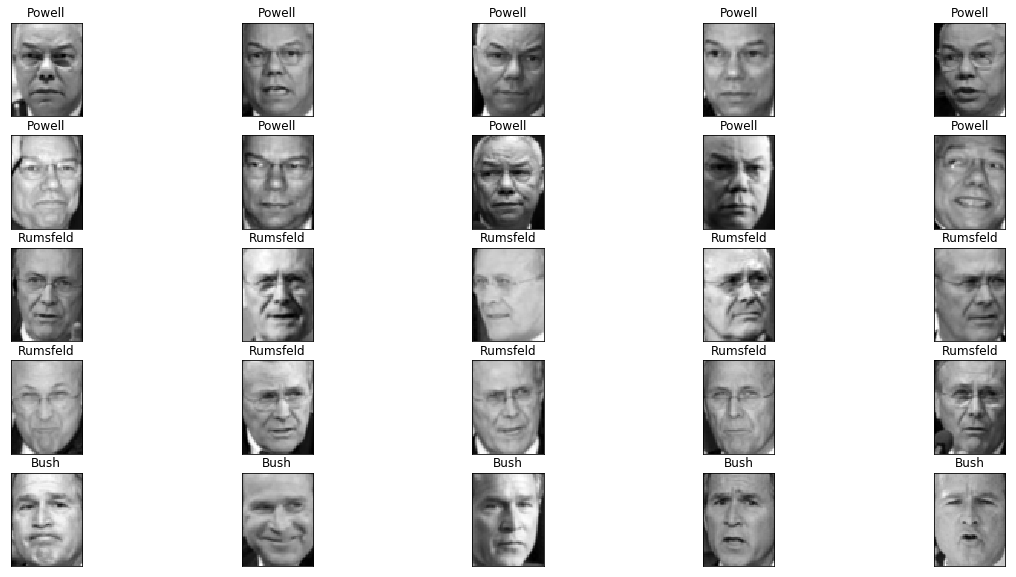

In [6]:
def plot_gallery(images, titles, h, w, rows=5, cols=5):
    plt.figure(figsize=(20,10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_title, target_names):
    for i in range(y_title.shape[0]):
        title = target_names[y_title[i]].split(' ')[-1]
        yield '{0}'.format(title)

prediction_titles = list(titles(y_subset, target_names))
plot_gallery(subset, prediction_titles, h, w)

## Função SVD

In [7]:
C = subset.T.dot(subset)
print(C.shape)
print("\nC:", C)

u,s, v = np.linalg.svd(C)

(2914, 2914)

C: [[ 421568.38  436259.1   452714.5  ...  457042.34  448361.56  430662.22]
 [ 436259.1   459152.28  482040.66 ...  471927.22  465099.9   446213.88]
 [ 452714.5   482040.66  514662.   ...  495487.72  489401.1   465689.9 ]
 ...
 [ 457042.34  471927.22  495487.72 ... 1088656.2  1086044.6  1009441.44]
 [ 448361.56  465099.9   489401.1  ... 1086044.6  1118348.   1059711.  ]
 [ 430662.22  446213.88  465689.9  ... 1009441.44 1059711.   1039824.94]]


# Eigenfaces resultantes da função SVD

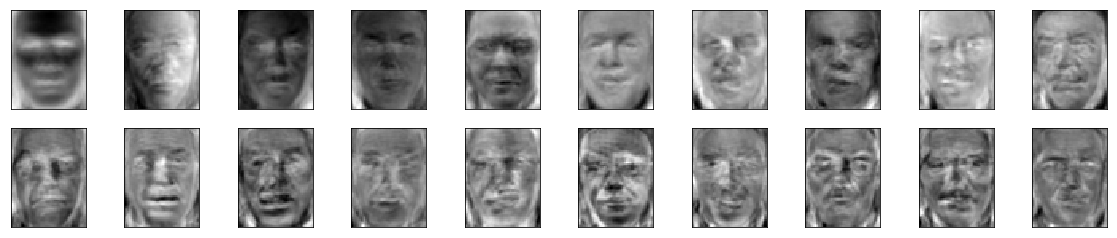

In [17]:
def plot_eigenfaces(images, h, w, rows=2, cols=10):
    plt.figure(figsize=(20,4))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_eigenfaces(v[:20], h, w)

## Função Eigh

In [9]:
autovalores, autovetores = np.linalg.eigh(C)
autovalores = np.flip(autovalores)
autovetores = np.flipud(autovetores.T)

# Eigenfaces resultantes da função eigh
## Ordena de forma crescente os autovalores e vetores, que tiveram que ser invertidos

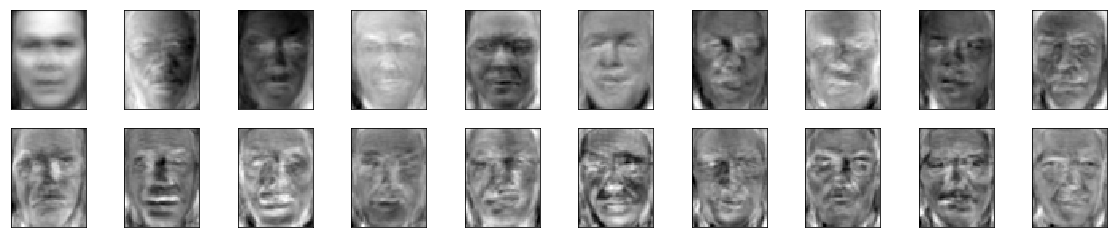

In [16]:
def plot_eigenfaces(images, h, w, rows=2, cols=10):
    plt.figure(figsize=(20,4))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_eigenfaces(autovetores[:20], h, w)

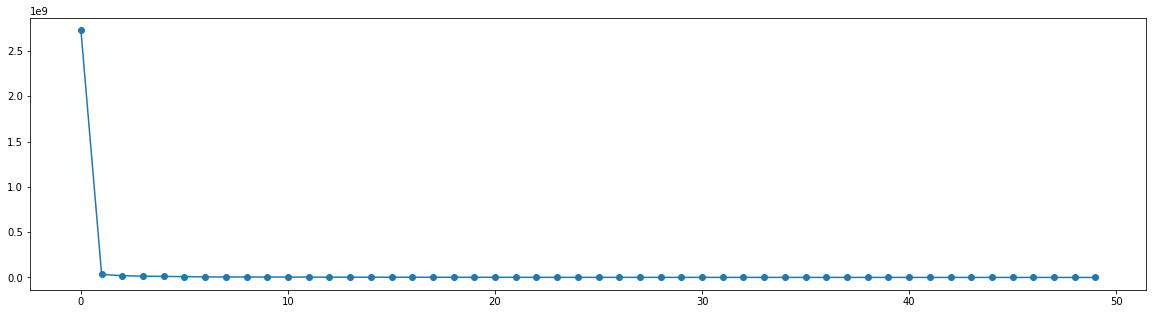

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
xvals = np.arange(50)
axs.plot(xvals, autovalores[:50], 'o-')
plt.show()

# Rosto médio

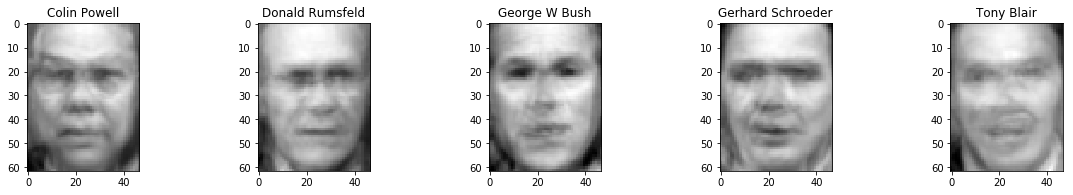

In [48]:
# rostos medios
medias = []
for i in range(0, num_pessoas):
    ds_pessoa = X[pessoas[i]]
    media = np.zeros(X[0].shape[0])
    for pi, p in enumerate(ds_pessoa):
        media += p
    media /= ds_pessoa.shape[0]
    medias.append(media)

plt.figure(figsize=(20,6))
columns = len(medias)
for i, image in enumerate(medias):
    sub = plt.subplot(len(medias) / columns + 1, columns, i + 1)
    sub.title.set_text(target_names[i])
    plt.imshow(image.reshape((h,w)), cmap=plt.cm.gray)

# projeção

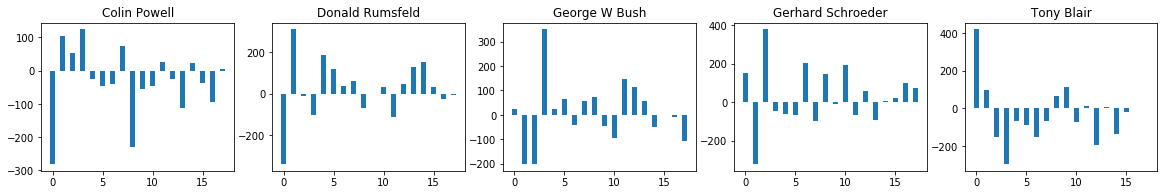

In [58]:
subvects = autovetores[2:20]
projs = []
f, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(20,6))
for i, image in enumerate(medias):
    proj = medias[i].dot(subvects.T)
    projs.append(proj)
    sub = plt.subplot(len(medias) / columns + 1, columns, i + 1)
    sub.title.set_text(target_names[i])
    idxs = np.arange(len(proj))
    bar_width = 0.5
    sub.bar(idxs, proj, bar_width)

# Teste

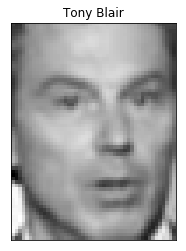

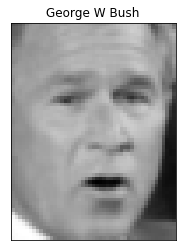

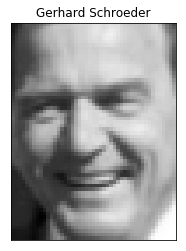

In [68]:
def print_face(idx):
    plt.figure()
    sub = plt.subplot()
    sub.imshow(X[idx].reshape((h,w)), cmap=plt.cm.gray)
    sub.title.set_text(target_names[y[idx]])
    plt.xticks(())
    plt.yticks(())
    plt.show()

blair = X[1000]
bush = X[1001]
schroeder = X[1002]

print_face(1000)
print_face(1001)
print_face(1002)